# Libraries

In [2]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import numpy as np 
import matplotlib.pyplot as plt
import random

# Autograd 

In [4]:
x = torch.rand(10, 3)
x

tensor([[0.2964, 0.8620, 0.6770],
        [0.3951, 0.7407, 0.5657],
        [0.7447, 0.1209, 0.9605],
        [0.6744, 0.5397, 0.7447],
        [0.9279, 0.8498, 0.1893],
        [0.8846, 0.9220, 0.9078],
        [0.5299, 0.1957, 0.1977],
        [0.2002, 0.8699, 0.2947],
        [0.1395, 0.4538, 0.4965],
        [0.7696, 0.4815, 0.8114]])

In [5]:
y = torch.rand(10, 2)
y

tensor([[0.2606, 0.5114],
        [0.7013, 0.8323],
        [0.8353, 0.0243],
        [0.0475, 0.7386],
        [0.1597, 0.6014],
        [0.9265, 0.9881],
        [0.8976, 0.7063],
        [0.3917, 0.1966],
        [0.1826, 0.3504],
        [0.7207, 0.2694]])

In [8]:
linear = nn.Linear(3, 2)
print('w: ', linear.weight)
print('b: ', linear.bias)

w:  Parameter containing:
tensor([[-0.3837, -0.3458,  0.2591],
        [ 0.2627, -0.1784,  0.1059]], requires_grad=True)
b:  Parameter containing:
tensor([ 0.4152, -0.4141], requires_grad=True)


In [14]:
linear.parameters()

<generator object Module.parameters at 0x000002207A516F90>

In [10]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.001)

In [13]:
pred = linear(x)

loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

loss after 1 step optimization:  0.5211935043334961


# Loading data from numpy

In [3]:
x = np.array([[1, 2, 3], [5, 7, 9]])
x

array([[1, 2, 3],
       [5, 7, 9]])

In [4]:
y = torch.from_numpy(x)
y

tensor([[1, 2, 3],
        [5, 7, 9]], dtype=torch.int32)

In [6]:
z = y.numpy
z

<function Tensor.numpy>

# Input pipeline with data in torch

In [2]:
# Download and construct mnist dataset.
train_dataset = torchvision.datasets.MNIST(root='data/', train=True, transform=transforms.ToTensor(), download=True)


C:\Users\dangv\anaconda3\envs\torch\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


torch.Size([1, 28, 28])
5


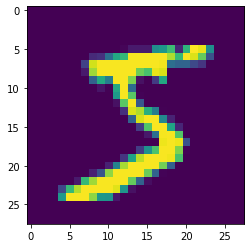

In [4]:
#Fetch one data pair
images, label = train_dataset[0]
print(images.shape)
print(label)
plt.imshow(np.transpose(images, (1,2,0)))
plt.show()


In [6]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

tensor(0)


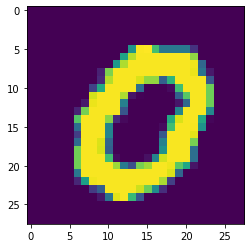

In [14]:
data_iter = iter(train_loader)
# Mini-batch images and labels
images, labels = next(data_iter)

i = random.randint(0, 64)
print(labels[i])
plt.imshow(np.transpose(images[i], (1, 2, 0)))

In [15]:
# Actual usage of the data loader is as below.
for images, labels in train_loader:
    #Training code should be written here
    pass

# Input pipeline for custom dataset

In [20]:
# Build a custom dataset below.

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        #TODO
        #1. Initialize file path or list of file name
        pass

    def __getitem__(self, index):
        #TODO
        #1. Read one data from file (eg: using numpy.fromfile, PIL.Image.open)
        #2. Preprocess the data (eg: torchvision.transforms)
        #3. Return a data pair (eg: image and label)
        pass

    def __len__(self):
        # You should change 0 to the total size of your dataset
        return 0


In [ ]:
# Using the data loader
custom_data = CustomDataset()
custom_loader = torch.utils.data.DataLoader(dataset=custom_data, batch_size=64, shuffle=True)

# Loss function 

## L1 loss(x, y) = abs(x - y)
### torch.nn.L1Loss

In [28]:

x = torch.tensor([[12, 82],[67, 7]], dtype=torch.float, requires_grad=True)
y = torch.tensor([[65, 69],[48, 1]], dtype=torch.float)

loss = nn.L1Loss()
output = loss(x, y)
output.backward()

print(x)
print(y)
print(output)


tensor([[12., 82.],
        [67.,  7.]], requires_grad=True)
tensor([[65., 69.],
        [48.,  1.]])
tensor(22.7500, grad_fn=<L1LossBackward>)


## MSE Loss  loss = (x - y)**2
nn.MSELoss

In [27]:
x = torch.tensor([[12, 82],[67, 7]], dtype=torch.float, requires_grad=True)
y = torch.tensor([[65, 69],[48, 1]], dtype=torch.float)

loss = nn.MSELoss(reduction='sum')
output = loss(x, y)
output.backward()

print(x)
print(y)
print(output)

tensor([[12., 82.],
        [67.,  7.]], requires_grad=True)
tensor([[65., 69.],
        [48.,  1.]])
tensor(3375., grad_fn=<MseLossBackward>)


## Crossentropy loss = - sum(x*log(y))
nn.CrossEntropyLoss

In [41]:
x = torch.tensor([[12, 82], [67, 7]], dtype=torch.float, requires_grad=True)
y = torch.tensor([0, 1], dtype=torch.long)

loss = nn.CrossEntropyLoss()
output = loss(x, y)
output.backward()

print(x)
print(y)
print(output)

tensor([[12., 82.],
        [67.,  7.]], requires_grad=True)
tensor([0, 1])
tensor(65., grad_fn=<NllLossBackward>)


## Binary crossentropy

In [58]:

loss = nn.BCELoss()
x = torch.tensor([0.5, 0.6], dtype=torch.float, requires_grad=True)
y = torch.tensor([0, 1], dtype=torch.float)

sigmoid = nn.Sigmoid()
output = loss(sigmoid(x), y)
output.backward()

print(sigmoid(x))
print(y)
print(output)

tensor([0.6225, 0.6457], grad_fn=<SigmoidBackward>)
tensor([0., 1.])
tensor(0.7058, grad_fn=<BinaryCrossEntropyBackward>)


## BCEWithLogitsLoss 

In [55]:
loss = nn.BCEWithLogitsLoss()
x = torch.tensor([0.5, 0.6], dtype=torch.float, requires_grad=True)
y = torch.tensor([0, 1], dtype=torch.float)
output = loss(x, y)
output.backward()

print(x)
print(y)

print(output)

tensor([0.5000, 0.6000], requires_grad=True)
tensor([0., 1.])
tensor(0.7058, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
